In [14]:
#Reusing the necessary libraries
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Other imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Classifications"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [19]:
# Load the data from the CSV file
data = pd.read_csv('hw06_data1.csv')

# Standardize the data
scaler = StandardScaler()
data[data.columns[:-1]] = scaler.fit_transform(data[data.columns[:-1]])
print(data.columns)


Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')


In [23]:
# 3.a Split the data into features and target class
X = data.drop('TARGET CLASS', axis=1)
y = data['TARGET CLASS']  

In [28]:
#3.b split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# Implement the KNN classifier using Euclidean distance
k = 27 
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [46]:
# Evaluate the model
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[135   7]
 [  9 149]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       142
           1       0.96      0.94      0.95       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



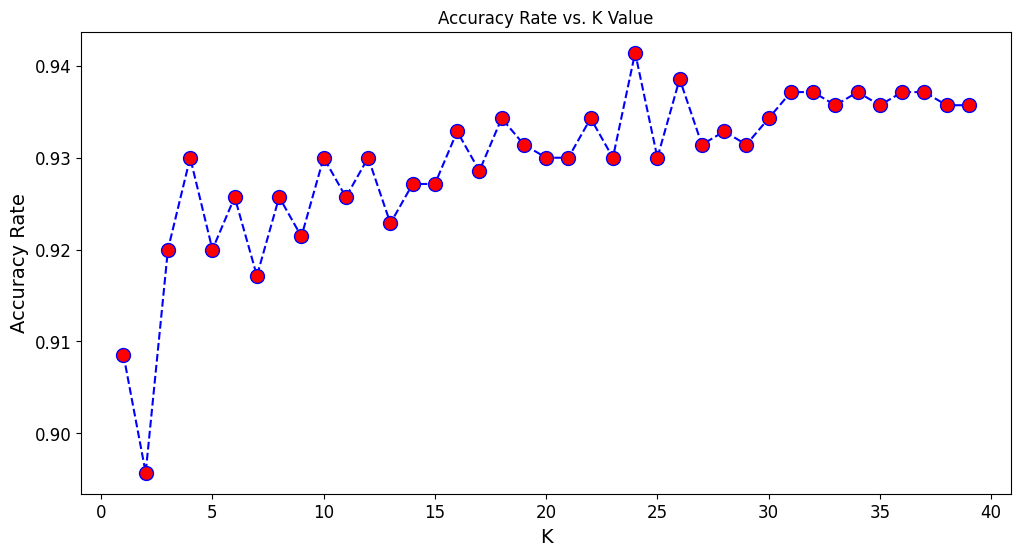

In [60]:
# 4.a Scikit-Learn’s K-fold cross-validation feature 
from sklearn.model_selection import cross_val_score

# Create an empty list to store the cross-validated accuracy for each value of K
accuracy_rate = []

# Use 10-fold cross-validation for each value of K (ranging from 1 to 40)
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    score = cross_val_score(knn, X_train, y_train, cv=10, scoring="accuracy")
    accuracy_rate.append(score.mean())

# Visualize the result
plt.figure(figsize=(12,6))
plt.plot(range(1,40), accuracy_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()


- 4.c In resulting plot, The accuracy rates for K values from 1 to 40. At the start, accuracy might go up quickly. This is because small K values can be sensitive to noise.After a while, the accuracy gain slows down or stops. This point, where the benefit of increasing K is minimal, is the "elbow".If accuracy drops as K gets even bigger, it means the model might be getting too general and losing accuracy.Identify where the curve starts to flatten. For example, if accuracy goes up fast until K=5 but slows by K=8, then K values between 5 and 8 are likely best. Picking the right K ensures your model is balanced. Too low, it's sensitive. Too high, it's general. The "elbow" gives a good balance between the two.

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [91]:
# # a. Load the data from the text file
data_path = "hw06_data2.txt"
data_2 = pd.read_csv(data_path, sep="\t", header=None)
X = data_2.iloc[:, 1]
y = data_2.iloc[:, 0]

In [103]:
# # b. Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [113]:
# c. Setting up the Naïve Bayes model.
model = make_pipeline(TfidfVectorizer(), MultinomialNB())


In [115]:
# d. Train the Naïve Bayes model with the training set.
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [134]:
# e. Evaluate the model with the test set.
y_pred = model.predict(X_test)

print("Confusion Matrix:\n\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n\n", classification_report(y_test, y_pred))


Confusion Matrix:

 [[966   0]
 [ 37 112]]

Classification Report:

               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       1.00      0.75      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115




- f. The model is very good at sorting out SMS messages and is 97% accurate for the classification of SMS messages into 'spam' and 'ham'. This means that out of every 100 SMS messages, the model correctly classifies 97 of them. It is especially good at identifying regular messages, and it never misclassifies a regular message as spam. This is important because it means that users are unlikely to miss important messages that have been mistakenly flagged as spam. The model also identifies most spam messages, but some spam messages do slip through the net. This shows that the model is balanced and errs on the side of caution to avoid flagging important messages as spam. However, there is still room for improvement in terms of identifying all spam messages.